# Movie_metadata notebook
In this notebook resides the dfs refering to the financial and distribution information of the movie. It's release languages, countries of origin, cost, release and duration.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import ast
from datetime import datetime
import time
from scipy import stats


from PIL import Image

import seaborn as sns

In [2]:
import EDA

EDA lib ready


In [3]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\movies_metadata.csv')
df.head(1)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                               homepage   id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  862  tt0114709                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   

  release_date      revenue runtime                          spoken_languages  \
0   1995-10-30  373554033.0    81.0  [{'iso_639_1': 'en', 'name': 'English'}]   

     status  tagline      title  video vote_average vote_count  
0  Released      NaN  Toy Story  False          7.7     5415.0  

[1 rows x 24 columns]

In [4]:
links = pd.read_csv(r'..\data\the-movies-dataset\ready_dfs\links_ready.csv')
links.head(1)

movieId  imdbId  tmdbId
0        1  114709     862

In [8]:
EDA.general_info(df)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status   

## Synopsis
Data refering to the movies premise, expressed in a Hollywood-formatted pitch.

In [7]:
synopsis = df[['id', 'original_title','overview']]

In [8]:
EDA.general_info(synopsis)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
id                45466 non-null object
original_title    45466 non-null object
overview          44512 non-null object
dtypes: object(3)
memory usage: 1.0+ MB
None

Index(['id', 'original_title', 'overview'], dtype='object')

(45466, 3)

-Presence of NaNs in df-
id                False
original_title    False
overview           True
dtype: bool

-Number of NaNs in df-
id                  0
original_title      0
overview          954
dtype: int64


As the number of NaN values is relatively light (954/45466), the missing rows will be dropped. 

In [13]:
synopsis['overview'] = synopsis['overview'].fillna(0)
synopsis = synopsis.loc[synopsis['overview'] != 0]

EDA.null_count(synopsis)

Presence of null in clolumns:
id                False
original_title    False
overview          False
dtype: bool

Number of null in columns:
id                0
original_title    0
overview          0
dtype: int64


In [14]:
EDA.df_save(synopsis)

## Profit
Financial data of the movie. Budget and revenue referedt to the cost and gross earnings of the movie.

In [5]:
profit = df[['id', 'budget', 'revenue']]

In [6]:
EDA.general_info(profit)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
id         45466 non-null object
budget     45466 non-null object
revenue    45460 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB
None

Index(['id', 'budget', 'revenue'], dtype='object')

(45466, 3)

-Presence of NaNs in df-
id         False
budget     False
revenue     True
dtype: bool

-Number of NaNs in df-
id         0
budget     0
revenue    6
dtype: int64


In [7]:
EDA.value_counter(profit)


id:
141971    3
15028     2
14788     2
109962    2
298721    2
         ..
30846     1
233917    1
75834     1
4254      1
146919    1
Name: id, Length: 45436, dtype: int64
----------------

budget:
0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
672000          1
29500000        1
3730500         1
9500            1
88              1
Name: budget, Length: 1226, dtype: int64
----------------

revenue:
0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64
----------------


In [8]:
to_nuke = dict(profit[pd.to_numeric(profit['budget'],errors='coerce').isnull()]['budget'])
print (f'{to_nuke}\n')

for e in to_nuke.keys():
    print(f'Deleting {e}')
    profit = profit.drop(e)
    
print('\n... Jpg columns dropped')

{19730: '/ff9qCepilowshEtG2GYWwzt2bs4.jpg', 29503: '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg', 35587: '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg'}

Deleting 19730
Deleting 29503
Deleting 35587

... Jpg columns dropped


In [9]:
before = profit['budget'].dtype
profit['budget'] = pd.to_numeric(profit['budget'], errors='coerce')
after = profit['budget'].dtype

print (f'{before}, {after}\n')

object, int64



In [46]:
budget_is_0 = (profit['budget']== 0).sum()
revenue_is_0 = (profit['revenue']== 0).sum()
per_1 =round((budget_is_0/profit.shape[0]) * 100, 2)
per_2 =round((revenue_is_0/profit.shape[0]) * 100, 2)
per_mean = round((per_1 + per_2) / 2,2)

print('---Strange data---')
print(f'Budget values equal to 0:{budget_is_0}, {per_1}% of the data.\nRevenue values equal to 0: {revenue_is_0}, {per_2}% of the data.')
print(f'\nRough aproximation of data affected: {per_mean}%')

---Strange data---
Budget values equal to 0:36573, 80.45% of the data.
Revenue values equal to 0: 38052, 83.7% of the data.

Rough aproximation of data affected: 82.08%


A very large percentage of data (about 82%) is invalid. No movie can exist without a budget. Also assuming these are all released movies (whether in theaters or direct to video/dvd) and revenue refers to all revenue collected, no movie can have a non existent revenue.

Therefore, continuing the profit exploration is futile, as the remaining data might or might not be relevant given the extent of the problem.

## Popularity
This df cotains a popularity score, not to ve confused with the vote average (see bellow), as this one does not operate in a 0 to 10 scale. Pourpose still undetermined.

In [5]:
popularity_df = df[['id', 'popularity']]
popularity_df.head(1)

id popularity
0  862    21.9469

In [6]:
popularity_df['popularity'].dtype

dtype('O')

In [7]:
before = popularity_df['popularity'].dtype
print (f'Type of data before cleanup: {before}')

prob_rows = popularity_df[pd.to_numeric(popularity_df['popularity'],errors='coerce').isnull()]['popularity'].index
print(f'\nData to drop:\n{prob_rows}\n')

print ('... Droping data and changing dtype')
popularity_df = popularity_df.drop(prob_rows, axis= 0)
popularity_df = popularity_df.dropna()
popularity_df['popularity'] = pd.to_numeric(popularity_df['popularity'], errors='coerce')
popularity_df['popularity'].dtype

after = popularity_df['popularity'].dtype
print(f'\nType of data after cleanup: {after}')

Type of data before cleanup: object

Data to drop:
Int64Index([19729, 19730, 29502, 29503, 35586, 35587], dtype='int64')

... Droping data and changing dtype

Type of data after cleanup: float64


In [103]:
popularity_df.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [8]:
popularity_df.id.isnull().any()

False

In [42]:
# function dormant
# df_save(popularity_df)

## Genres
The df refers to the genres assigned to a movie (e g. Science-fiction, Noir, Romance... etc.).

In [5]:
genres = pd.DataFrame(df[['id', 'genres']])
genres['genres'] = genres['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genres.columns = ['id', 'genre']

In [185]:
EDA.general_info(genres)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
id       45466 non-null object
genre    45466 non-null object
dtypes: object(2)
memory usage: 710.5+ KB
None

Index(['id', 'genre'], dtype='object')

(45466, 2)

-Presence of NaNs in df-
id       False
genre    False
dtype: bool


In [6]:
nuke = dict(genres[pd.to_numeric(genres['id'],errors='coerce').isnull()]['id'])
print (nuke)

{19730: '1997-08-20', 29503: '2012-09-29', 35587: '2014-01-01'}


In [103]:
df.loc[nuke.keys()]

adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o...  2012-09-29       0   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}]  2014-01-01       0   

      original_language                            original_title  overview  \
19730             104.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
29503              68.0      [{'iso_639_1': 'ja', 'name': '日本語'}]  Released   
35587              82.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... release_date revenue runtime spoken_languages status  tagline  \
19730  ...            1     NaN     NaN              NaN    NaN      NaN   
29503  ...           12     NaN     NaN              NaN    NaN      NaN   
35587  ...           22     NaN     NaN              NaN    NaN      NaN   

       title video vote_average vote_count  
19730    NaN   NaN          NaN        NaN  
29503    NaN   NaN          NaN        NaN  
35587    NaN   NaN          NaN        NaN  

[3 rows x 24 columns]

In [7]:
genres = genres.drop(nuke.keys(), axis = 0)

print(genres.id.dtype)
genres.id = genres.id.astype(int, errors= 'raise')
print(genres.id.dtype)

object
int32


In [93]:
genres['genre'].value_counts()

[Drama]                                 5000
[Comedy]                                3621
[Documentary]                           2723
[]                                      2442
[Drama, Romance]                        1301
                                        ... 
[Science Fiction, Horror, Adventure]       1
[Thriller, Comedy, Crime, Adventure]       1
[Mystery, Thriller, Adventure]             1
[TV Movie, Drama, Romance, Family]         1
[History, Action, Adventure, War]          1
Name: genre, Length: 4066, dtype: int64

In [95]:
genres_count = genres['genre'].value_counts().head(10)
genres_count

Drama                     5000
Comedy                    3621
Documentary               2723
Drama, Romance            1301
Comedy, Drama             1135
Horror                     974
Comedy, Romance            930
Comedy, Drama, Romance     593
Drama, Comedy              532
Horror, Thriller           528
Name: genre, dtype: int64

In [11]:
genres_unique = EDA.from_list_to_single (genres, col_1= 'genre', col_2= 'genre')
genres_unique

genre
0         Animation
1            Comedy
2            Family
3         Adventure
4           Fantasy
5           Romance
6             Drama
7            Action
8             Crime
9          Thriller
10           Horror
11          History
12  Science Fiction
13          Mystery
14              War
15          Foreign
16            Music
17      Documentary
18          Western
19         TV Movie

In [12]:
print (genres_unique.tail())
genres_unique = genres_unique.drop(genres_unique.index[20:])

print("\nStrange columns dropped")
print(genres_unique.tail())

genre
15      Foreign
16        Music
17  Documentary
18      Western
19     TV Movie

Strange columns dropped
          genre
15      Foreign
16        Music
17  Documentary
18      Western
19     TV Movie


In [16]:
genre_counts = EDA.genre_counter(genres, genres_unique, 'genre')
genre_counts = genre_counts.sort_values(by = 'counts', ascending = False)

In [19]:
genres['genre'] = genres['genre'].apply(', '.join)
genres = genres.replace('', np.NaN).dropna(how='all')
genres.head()

id                       genre
0    862   Animation, Comedy, Family
1   8844  Adventure, Fantasy, Family
2  15602             Romance, Comedy
3  31357      Comedy, Drama, Romance
4  11862                      Comedy

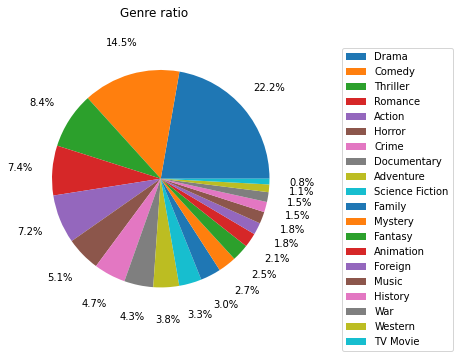

In [17]:
labels = genre_counts['genre']


# Plotting graph
plt.figure(figsize=(7,5))
plt.pie(genre_counts['counts'],  autopct='%1.1f%%', startangle=0, shadow= False, pctdistance = 1.3)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, bbox_to_anchor=(1.15, 1), loc= 'upper left')
plt.suptitle('Genre ratio', fontsize=12)

plt.show()

As the results indicate, the most popular genre is "drama". However it should be noted that drama usually appears in combination with other categories. As such it must be understood not only as a film genre in its own right but also as an element of a story.

By contrast "TV Movie" is the least popular of the set. In a similar way as drama, the movies made for direct to video or TV release are usually refered as such because they are not released in theaters. And always contain other genres seen in the pieplot graph.

In [161]:
# function dormant
EDA.df_save(genres)
EDA.df_save(genres_unique_2)
EDA.df_save(genre_counts)

## Production countries
Data related to the production country and relase language of the movie

In [124]:
df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [38]:
countries = EDA.single_condition_separator(df = df, col_list = ['id', 'production_countries', 'original_language'], col_search = 'production_countries',  cond_1 = 'name')
countries.head()

id        production_countries original_language
0    862  [United States of America]                en
1   8844  [United States of America]                en
2  15602  [United States of America]                en
3  31357  [United States of America]                en
4  11862  [United States of America]                en

In [46]:
countries['production_countries'] = countries['production_countries'].apply(', '.join)
countries = countries.replace('', np.NaN).dropna(how='all')
countries.head()

id      production_countries original_language
0    862  United States of America                en
1   8844  United States of America                en
2  15602  United States of America                en
3  31357  United States of America                en
4  11862  United States of America                en

In [50]:
productions = countries['production_countries'].value_counts().head(10)
productions

United States of America                    17851
United Kingdom                               2238
France                                       1654
Japan                                        1356
Italy                                        1030
Canada                                        840
Germany                                       749
Russia                                        735
India                                         735
United Kingdom, United States of America      569
Name: production_countries, dtype: int64

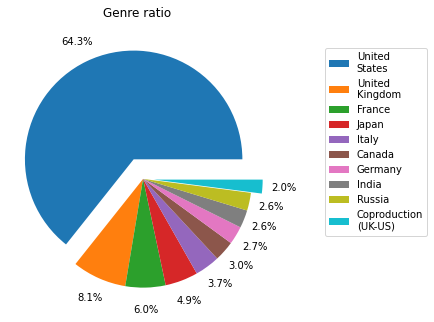

In [60]:
labels = 'United\nStates', 'United\nKingdom', 'France', 'Japan', 'Italy', 'Canada', 'Germany', 'India', 'Russia', 'Coproduction\n(UK-US)'
explode = 0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0.1

# Plotting graph
plt.figure(figsize=(7,5))
plt.pie(productions,  autopct='%1.1f%%', explode = explode, startangle=0, shadow= False, pctdistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, bbox_to_anchor=(1.15, 1), loc= 'upper left')
plt.suptitle('Genre ratio', fontsize=12)

plt.show()

After eliminiating all non-valid data, the results paint a very clear picture. 64.3% of the productions are solely of US origin, and very distanly followed by the UK, France and Japan, with 8.1, 6 and 4.9% respectively. As a sidenote, the last entry on the graph indicates a co-production. This not only adds to the already huge american influence, but illustrates how film as a colaborative medium is quite an expensive endeavour.

This would explain the category "foreign" listed in "genres", also it allows the inferance of the origin of the data: the US.

In [63]:
languages = dict(countries['original_language'].value_counts().head(10))
languages

{'en': 32269,
 'fr': 2438,
 'it': 1529,
 'ja': 1350,
 'de': 1080,
 'es': 994,
 'ru': 826,
 'hi': 508,
 'ko': 444,
 'zh': 409}

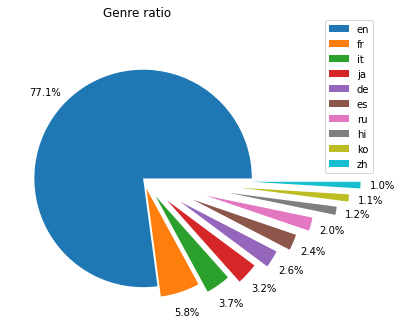

In [71]:
labels = languages.keys()
explode = 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1

# Plotting graph
plt.figure(figsize=(7,5))
plt.pie(languages.values(),  autopct='%1.1f%%', explode = explode, startangle=0, shadow= False, pctdistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, bbox_to_anchor=(1.15, 1.1), loc= 'upper left')
plt.suptitle('Genre ratio', fontsize=12)

plt.show()

As the last graph shows, the english-speaking market is in a clear predominant position. However, the combination of the languages provides a more clear picture than the solely country based one of the film demographics. For instance, while french remains in second place, japanese has surpassed italian and spanish makes a sudden appereance ahead of russian or hindi.



In [130]:
# Function dormant
# df_save(countries)

## Realease Dates and runtime
This df contains information refering to the release date and runtime of the movie.

In [91]:
dates = pd.DataFrame(df[['id', 'release_date', 'runtime']])
dates.head()

id release_date  runtime
0    862   1995-10-30     81.0
1   8844   1995-12-15    104.0
2  15602   1995-12-22    101.0
3  31357   1995-12-22    127.0
4  11862   1995-02-10    106.0

In [74]:
EDA.general_info(dates)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
id              45466 non-null object
release_date    45379 non-null object
runtime         45203 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.0+ MB
None

Index(['id', 'release_date', 'runtime'], dtype='object')

(45466, 3)

-Presence of NaNs in df-
id              False
release_date     True
runtime          True
dtype: bool

-Number of NaNs in df-
id                0
release_date     87
runtime         263
dtype: int64


In [92]:
print('Changing wrong dtypes...')
print(dates['release_date'].dtype)
dates['release_date'] = pd.to_datetime(dates.release_date, errors='coerce')
print(dates['release_date'].dtype)

print('\nDeleting NaN values...')
print(dates.isnull().sum())
dates = dates.dropna()
print(dates.isnull().sum())

Changing wrong dtypes...
object
datetime64[ns]

Deleting NaN values...
id                0
release_date     90
runtime         263
dtype: int64
id              0
release_date    0
runtime         0
dtype: int64


After dropping the few NaN values, a copy of the df will be created (dates_2) in order to save available information and keep exploring the data at the same time.

In [126]:
# The copy
dates_2 = dates.copy() 
dates_2.head()

id release_date  runtime
0    862   1995-10-30     81.0
1   8844   1995-12-15    104.0
2  15602   1995-12-22    101.0
3  31357   1995-12-22    127.0
4  11862   1995-02-10    106.0

In [137]:
# Function dormant
# df_save(dates)

Filtering copy to show evolution of the runtime by decade.

In [127]:
dates_2 = dates_2.set_index('release_date')
dates_2 = dates_2.groupby(pd.Grouper(freq = '10Y')).mean()
dates_2['runtime'] = dates_2['runtime'].sort_values(ascending = True)
dates_2.head()

runtime
release_date           
1874-12-31     1.000000
1884-12-31     1.000000
1894-12-31     1.096774
1904-12-31     2.545455
1914-12-31    30.468085

In [128]:
print(f"{dates_2.tail(1)}\n\n{dates_2.head(1)}")

runtime
release_date           
2024-12-31    92.854899

              runtime
release_date         
1874-12-31        1.0


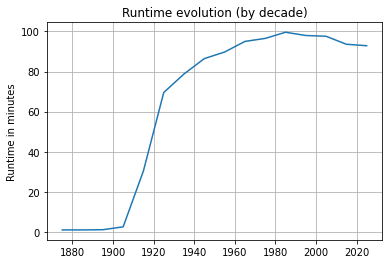

In [123]:
# Data
x = dates_2.index
y = dates_2.runtime

# Plotting
plt.plot(x, y)


# Labels
plt.title('Runtime evolution (by decade)')
plt.ylabel('Runtime in minutes')
plt.grid(True)

In [125]:
max_time = dates_2.index.max()

dates_2.loc[dates_2.index == max_time]

runtime
release_date           
2024-12-31    92.878055

As the graph show, the avearge runtime of movies increased dramaticly during the first years of the existance of cinema. This trend stops until it plateus in the 1980s and settles around the 90' mark.

It should also be noted that the data contains movies that, at the time of analisys, have not been released yet. They may still be in preproduciton or in active production, as such their runtime should be interpreted as subject to change.

## Vote average
This df refers to the number of people who voted the score or quality of a given film.

In [129]:
votes = df[['id', 'vote_average', 'vote_count']]
votes.head(1)

id  vote_average  vote_count
0  862           7.7      5415.0

In [130]:
EDA.general_info(votes)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
id              45466 non-null object
vote_average    45460 non-null float64
vote_count      45460 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB
None

Index(['id', 'vote_average', 'vote_count'], dtype='object')

(45466, 3)

-Presence of NaNs in df-
id              False
vote_average     True
vote_count       True
dtype: bool

-Number of NaNs in df-
id              0
vote_average    6
vote_count      6
dtype: int64


In [131]:
votes = votes.dropna()

In [133]:
vote_average_count = dict(votes.vote_average.apply(EDA.rounder).value_counts())
vote_average_count

{6: 15675,
 7: 10229,
 5: 7343,
 8: 3831,
 4: 3506,
 0: 3011,
 3: 817,
 2: 413,
 9: 296,
 10: 210,
 1: 129}

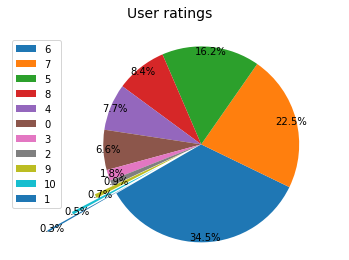

In [136]:
# Labels
labels = vote_average_count.keys()
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0.49, 0.8)  

# Plot
plt.pie(vote_average_count.values(), explode= explode, autopct = '%1.1f%%', startangle = 210, pctdistance = 0.95)

# Legends and titles
plt.legend(labels, loc= 'best')

plt.suptitle('User ratings', fontsize = 14)
plt.axis('equal')
plt.show()

In [137]:
votes['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

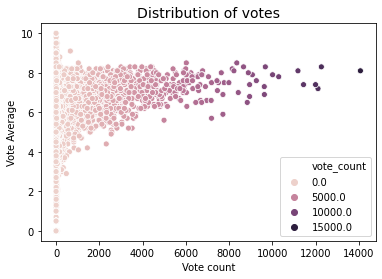

In [141]:
ax = sns.scatterplot(x=votes['vote_count'], y=votes['vote_average'], hue=votes['vote_count'])

plt.title("Distribution of votes", fontsize = 14)
plt.xlabel("Vote count")
plt.ylabel("Vote Average")
plt.show()

In [ ]:
# function dormant
# df_save(votes)

The data clearly states that the majority of the users rates movies quality from 6 to 8. A somewhat different scaling system to that of the movie critics (even accounting for differences in scale). It is also noticebale the almost lack of presence of 10's, 3's and bellow values, suggesting a more generous yet not so forggiving rating system.